In [191]:
from dotenv import load_dotenv
import os
import sys
from pathlib import Path

load_dotenv()

AVES_ROOT = Path(os.environ['AVES_ROOT'])

DATA_PATH = AVES_ROOT / "data" / "external" / "hito"
PROCESSED_PATH = AVES_ROOT / "data" / "processed"

In [192]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import geopandas as gpd

from aves.data import eod
from aves.features.utils import normalize_rows, normalize_columns
from aves.config import setup_style

setup_style()
os.getcwd()


'/home/ksmnt/Universidad/CC5208/aves/notebooks/vis-course/2024-otoño'

In [193]:

ciclovias_2021 = gpd.read_file(DATA_PATH / "Evaluación_de_la_Red_de_Ciclovías_del_Gran_Santiago_según_el_Decreto_102.geojson" )
df_2021_sin = gpd.read_file( DATA_PATH / "siniestros_bicicletas" / "geojson" / "Siniestros_con_participación_de_bicicletas,_RM_Chile,_2021..geojson")


Se le cambia el nombre a la columna "COMUNA" por "Comuna" y sus valores de "EJEMPLO" a "Ejemplo"

In [194]:
# "COMUNA" is renamed to "Comuna" in the ciclovias dataset
ciclovias_2021.rename(columns={"COMUNA": "Comuna"}, inplace=True)
# Each value in the "Comuna" column is capitalized
ciclovias_2021["Comuna"] = ciclovias_2021["Comuna"].str.title()

Se carga el archivo GeoJSON de las ciclovías

<Axes: >

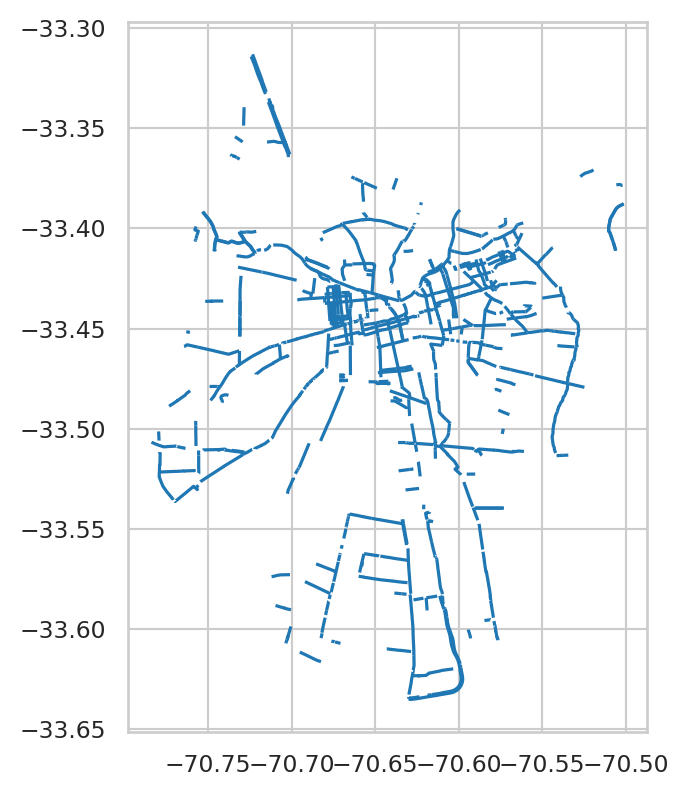

In [195]:
ciclovias_2021.plot()

In [196]:
zones = (
    gpd.read_file(PROCESSED_PATH / "scl_zonas_urbanas.json")
    .set_index("ID")
    .to_crs(ciclovias_2021.crs)
)
zones.head()

,AREA,Zona,Com,Comuna,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,URBANO,TIPO,NOM_CATEG,SHAPE_Leng,SHAPE_Area,area_m2,geometry
ID,,,,,,,,,,,,,,,,,
103,837.7500,103.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,4.575649e+05,"POLYGON ((-70.65492 -33.55500, -70.65517 -33.5..."
104,998.8125,104.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.725462e+05,"POLYGON ((-70.67599 -33.55542, -70.67452 -33.5..."
106,286.2500,106.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,2.693838e+06,"POLYGON ((-70.67891 -33.55911, -70.68019 -33.5..."
115,857.4375,115.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.534193e+05,"POLYGON ((-70.67625 -33.55513, -70.67653 -33.5..."
116,853.9375,116.0,13105,El Bosque,13,REGIÓN METROPOLITANA DE SANTIAGO,131,SANTIAGO,13105,EL BOSQUE,EL BOSQUE,CAPITAL COMUNAL,CIUDAD,0.152123,0.001391,7.184305e+05,"POLYGON ((-70.66564 -33.55260, -70.66309 -33.5..."


<Axes: >

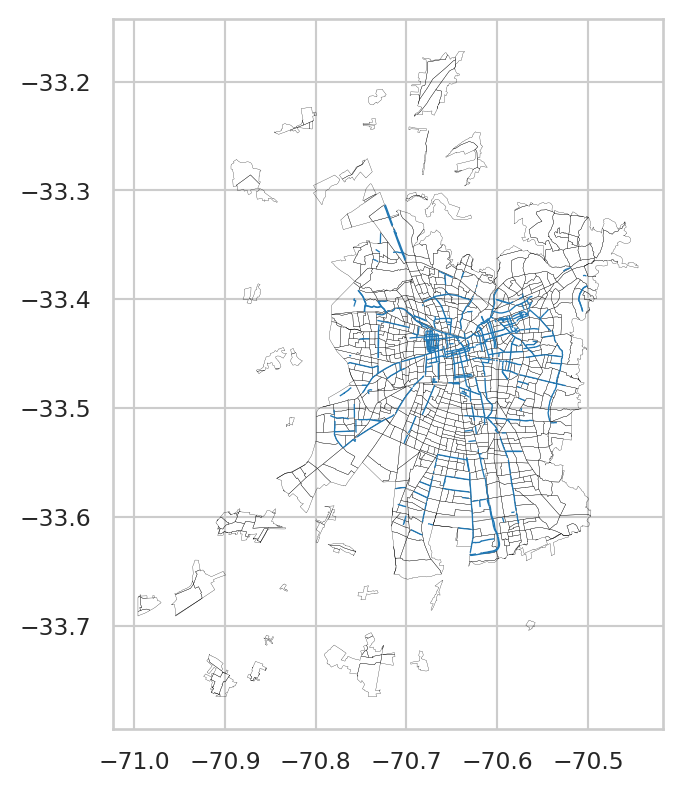

In [197]:
ax = ciclovias_2021.plot(linewidth=0.5)
zones.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.1)

Se filtran las comunas de zones que no están en ciclovías

In [198]:
# drop all rows in zones that are not in ciclovias_2021
zones = zones[zones["Comuna"].isin(ciclovias_2021["Comuna"])]

# print them ordered alphabetically
print("Zones: Después de filtrar ordenado:")
print(zones["Comuna"].sort_values().unique())

# all Comuna in ciclovias_2021
print("Ciclovias 2021")
print(ciclovias_2021["Comuna"].sort_values().unique())

Zones: Después de filtrar ordenado:
['Cerrillos' 'Cerro Navia' 'Conchalí' 'El Bosque' 'Estación Central'
 'Huechuraba' 'Independencia' 'La Cisterna' 'La Florida' 'La Granja'
 'La Pintana' 'La Reina' 'Las Condes' 'Lo Espejo' 'Lo Prado' 'Macul'
 'Maipú' 'Pedro Aguirre Cerda' 'Peñalolén' 'Providencia' 'Pudahuel'
 'Puente Alto' 'Quilicura' 'Quinta Normal' 'Recoleta' 'Renca'
 'San Bernardo' 'San Joaquín' 'San Miguel' 'San Ramón' 'Santiago'
 'Vitacura' 'Ñuñoa']
Ciclovias 2021
['Cerrillos' 'Cerro Navia' 'Conchalí' 'El Bosque' 'Estación Central'
 'Huechuraba' 'Independencia' 'La Cisterna' 'La Florida' 'La Granja'
 'La Pintana' 'La Reina' 'Las Condes' 'Lo Espejo' 'Lo Prado' 'Macul'
 'Maipú' 'Pedro Aguirre Cerda' 'Peñalolén' 'Providencia' 'Pudahuel'
 'Puente Alto' 'Quilicura' 'Quinta Normal' 'Recoleta' 'Renca'
 'San Bernardo' 'San Joaquín' 'San Miguel' 'San Ramón' 'Santiago'
 'Vitacura' 'Ñuñoa']


Se muestra el mapa nuevo

<Axes: >

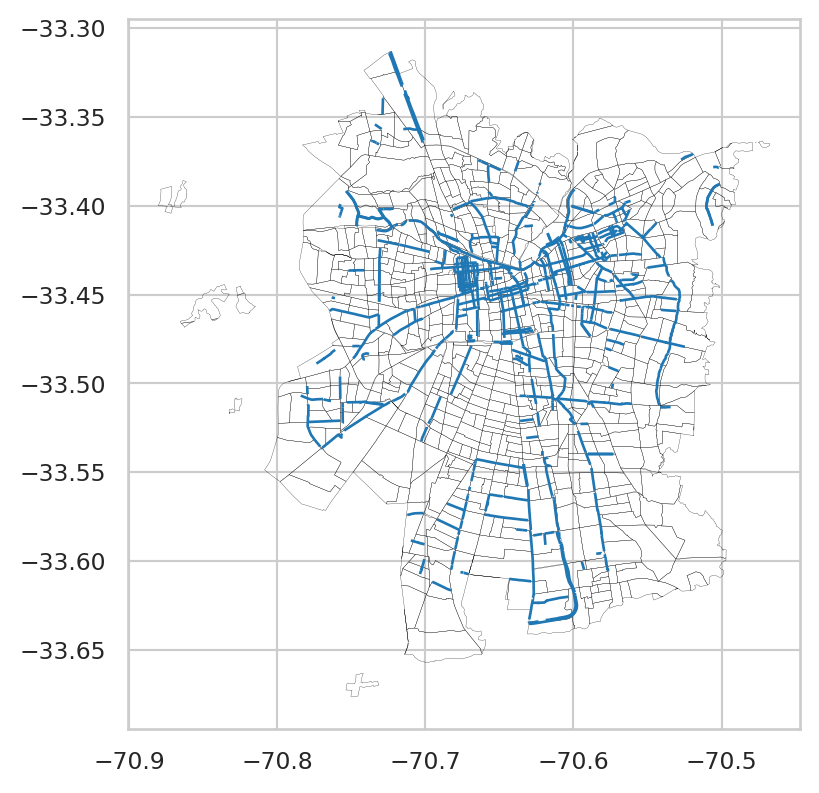

In [200]:
ax = ciclovias_2021.plot(linewidth=0.5)
zones.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=0.1)